# Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing


In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

In [2]:
train_df = pd.read_csv('./assignment2_data/assignment_2_train.csv')
test_df = pd.read_csv('./assignment2_data/assignment_2_test.csv')

In [3]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


Расмотрим, для начала, что из себя представляет датасет.

In [4]:
test_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df['isFraud'].value_counts()

0    96197
1     3804
Name: isFraud, dtype: int64

In [6]:
train_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df['isFraud'].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

Выборки что на обучении, что на тесте не сбалансированы. При обучении скорее всего придется отдельно выполнять баласировку. 

In [8]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


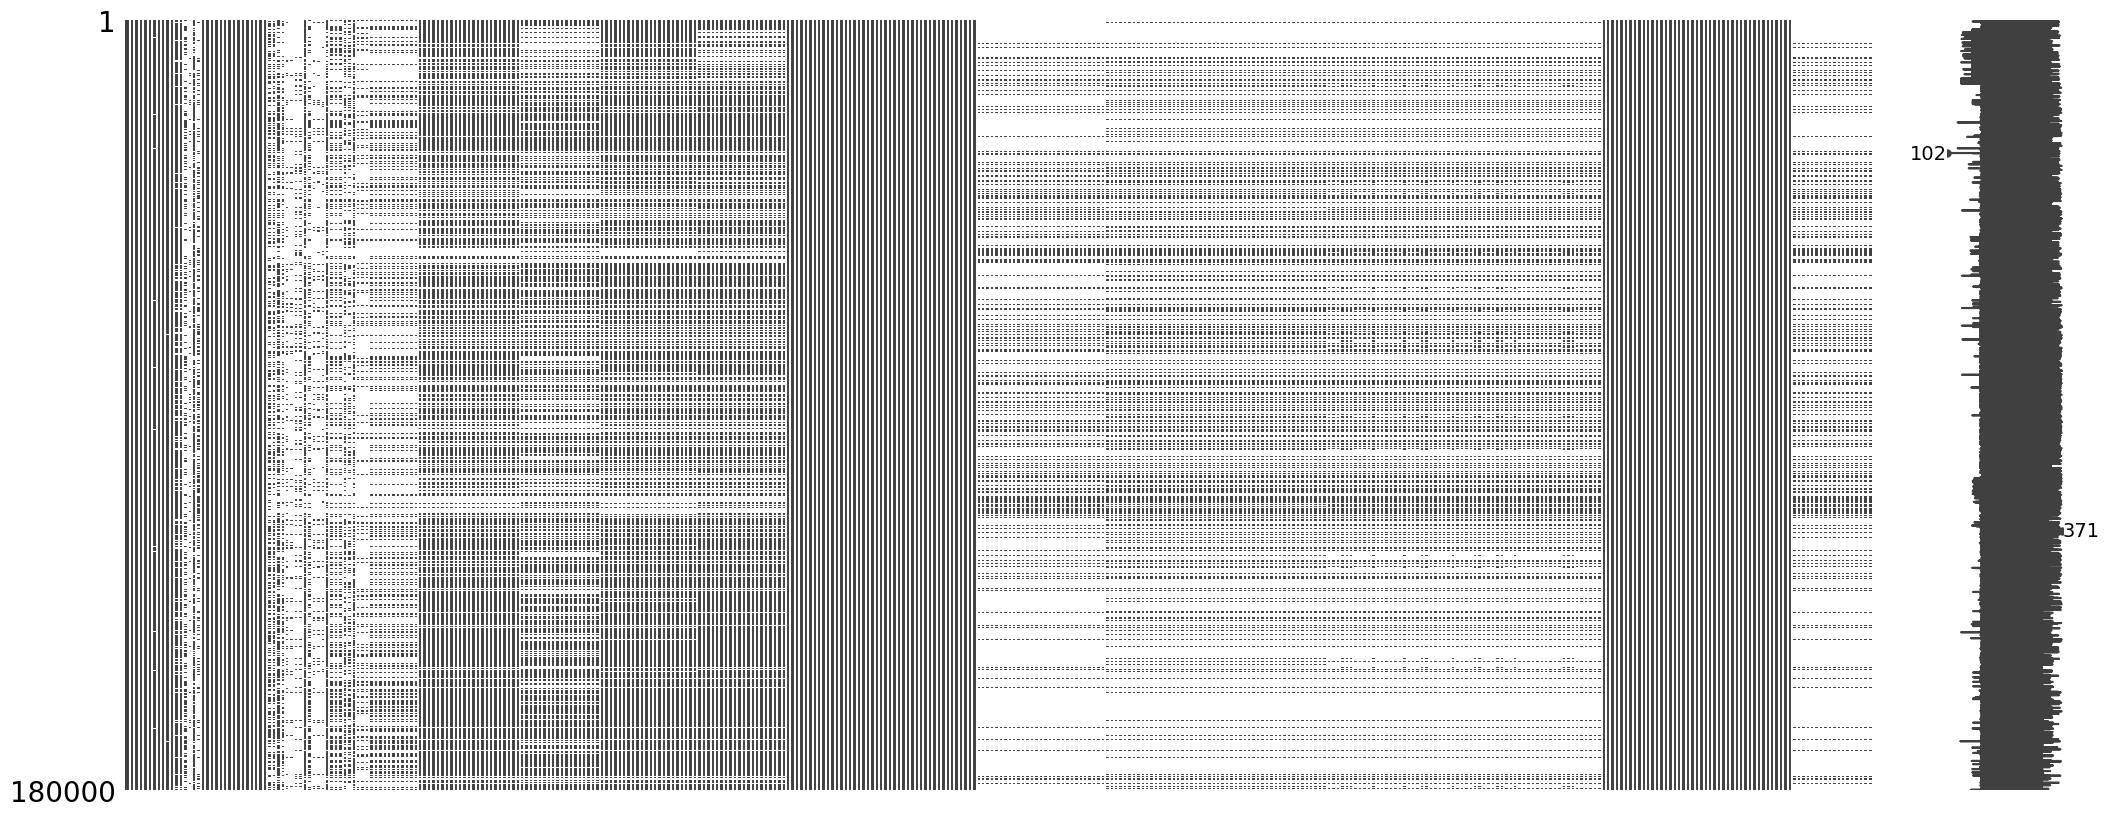

In [9]:
msno.matrix(train_df)
plt.show()

В наборе данных имеется большое к-во пропщенных значений. 

## Задание 1:
 Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

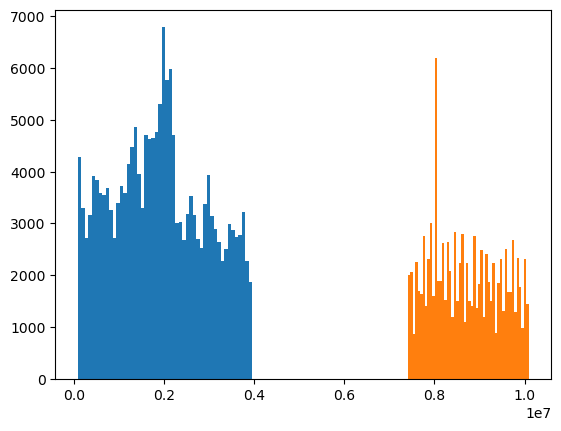

In [10]:
plt.hist(train_df['TransactionDT'], 50)
plt.hist(test_df['TransactionDT'], 50)
plt.show()

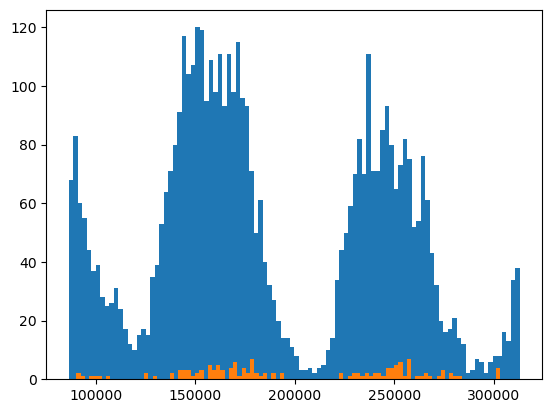

In [11]:
plt.hist(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

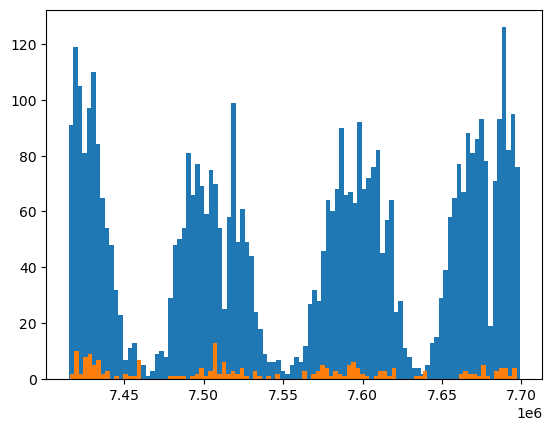

In [12]:
plt.hist(test_df.loc[((test_df['isFraud']==0) & (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.hist(test_df.loc[((test_df['isFraud']==1) &  (test_df['TransactionDT'][:10000]),'TransactionDT')], 100)
plt.show()

## Задание 2:
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

In [13]:
# TransactionAmt - сумма транзакции.
# TransactionDT - дата/время транзакции.

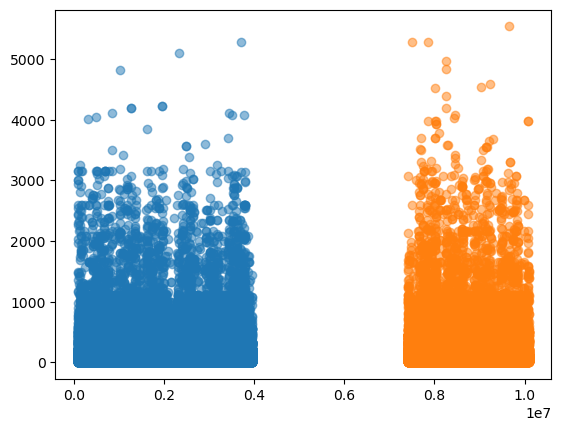

In [14]:
plt.scatter(train_df['TransactionDT'], train_df['TransactionAmt'], alpha=0.5)
plt.scatter(test_df['TransactionDT'], test_df['TransactionAmt'], alpha=0.5)
plt.show()

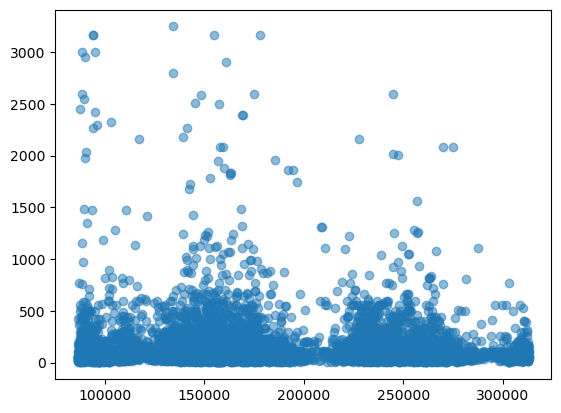

In [15]:
plt.scatter(train_df['TransactionDT'][:10000], train_df['TransactionAmt'][:10000], alpha=0.5)
plt.show()

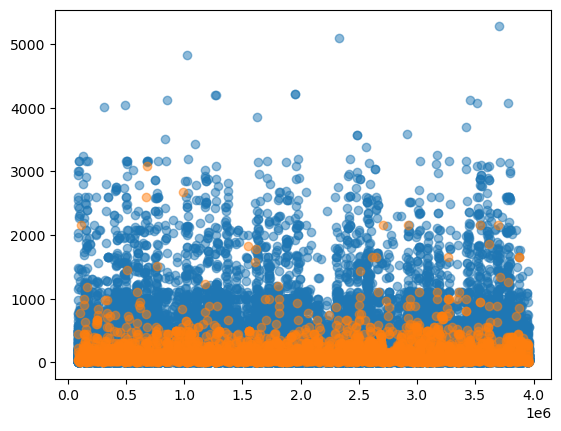

In [16]:
plt.scatter(train_df.loc[(train_df['isFraud']==0,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==0,'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[(train_df['isFraud']==1,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==1,'TransactionAmt')], alpha=0.5)
plt.show()

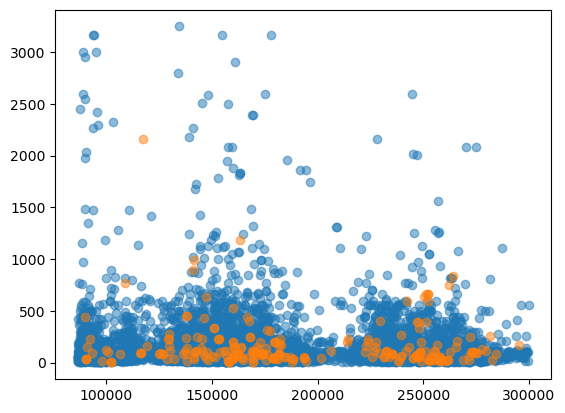

In [17]:
plt.scatter(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==0) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.show()

Видно, что суммы транзакций имеют периодических характер во времени. К-во мошейнеческих транзакций также менятес с тесчением времени вцелом повторя динамику обычных. 

Если судить по графику, суммы мошейнеческих транзакций в целом вдое ниже чем суммы оычных. 

так если большая часть транзакций прнимает значение чуть больше 1000 у.е. , то мошейнеческие транзакции соврешаются на сумму до 500 у.е. 

## Задание 3:
 построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.


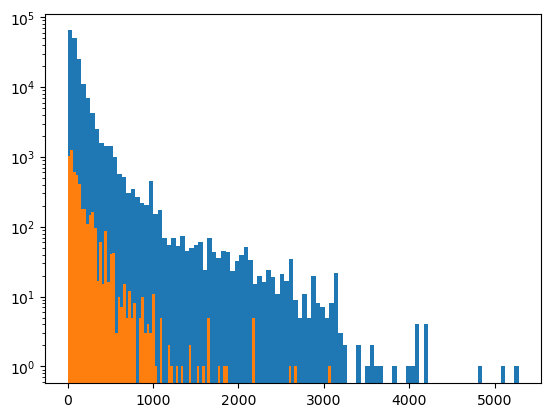

In [18]:
plt.hist(train_df.loc[(train_df['isFraud']==0, 'TransactionAmt') ], bins=100)
plt.hist(train_df.loc[(train_df['isFraud']==1, 'TransactionAmt') ], bins=100)
plt.yscale('log')
plt.show()

## Задание 4:
 построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

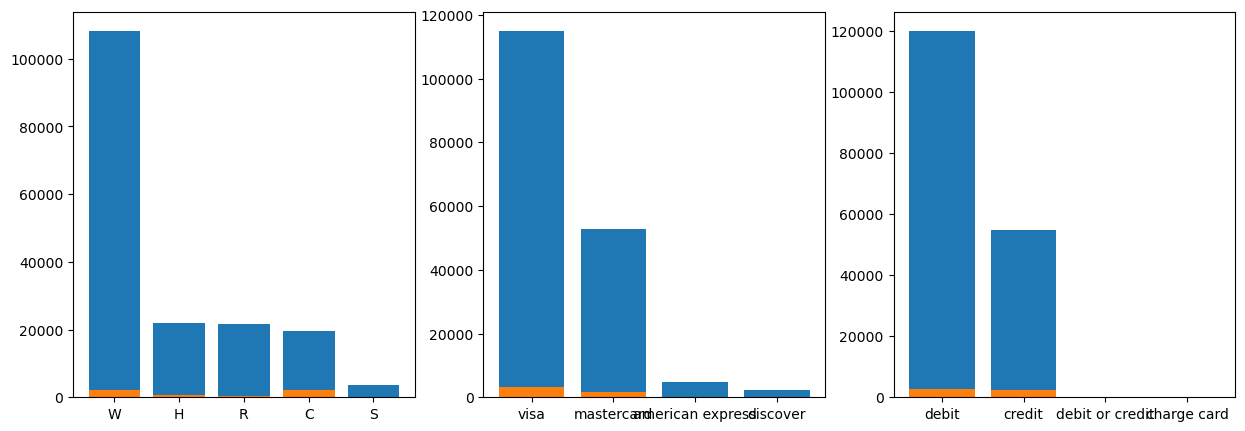

In [19]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==0, feature)].value_counts()
    ax[i].bar( values_list.index, values_list.values)
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

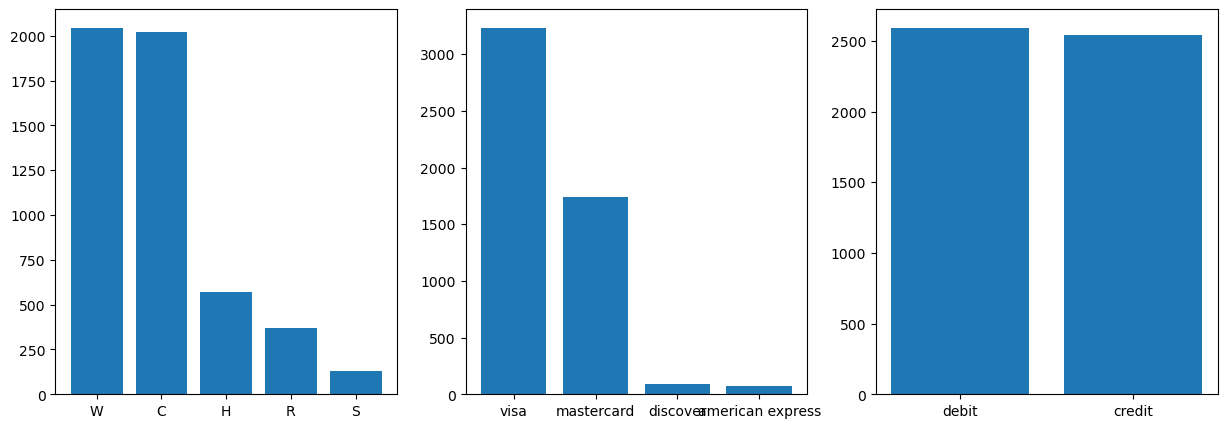

In [20]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

## Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

## Задание 1:
отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [21]:
y_data_train = train_df['isFraud']
x_data_train = train_df.drop(['isFraud'],axis=1)

y_data_test = test_df['isFraud']
x_data_test = test_df.drop(['isFraud'],axis=1)

In [22]:
# Получим список катероиальных и числовых признаков.

categorical = []
numerical = []
for col, value in x_data_train.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [23]:
x_data_train[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
x_data_train_num = x_data_train[numerical]
y_train = y_data_train

x_data_test_num = x_data_test[numerical]
y_valid = y_data_test

In [25]:
dtrain = xgb.DMatrix(
    data=x_data_train_num, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_data_test_num, label=y_valid
)

In [26]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    # "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 4,
    "gamma": 4,
    "nthread": 6,
    "seed": 27
}

In [27]:
xgb_model_1 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.63401	valid-auc:0.63204
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[25]	train-auc:0.84808	valid-auc:0.82511
[50]	train-auc:0.88692	valid-auc:0.85101
[75]	train-auc:0.89884	valid-auc:0.85417
[100]	train-auc:0.90554	valid-auc:0.85581
[125]	train-auc:0.91011	valid-auc:0.85768
[150]	train-auc:0.91405	valid-auc:0.85835
[175]	train-auc:0.91757	valid-auc:0.85909
[200]	train-auc:0.92032	valid-auc:0.85979
[225]	train-auc:0.92246	valid-auc:0.86069
[250]	train-auc:0.92498	valid-auc:0.86036
[275]	train-auc:0.92682	valid-auc:0.86067
Stopping. Best iteration:
[235]	train-auc:0.92362	valid-auc:0.86085



In [28]:
def draw_roc_auc(model, dtrain, dvalid, y_train, y_valid):
    #  тест   
    try:
        y_pred_train = model.predict_proba(dtrain)[:,1]      
    except:
        y_pred_train = model.predict(dtrain)
    roc_auc_train=roc_auc_score(y_train, y_pred_train)
    # print(roc_auc_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_train)

    try:
        y_pred_val = model.predict_proba(dvalid)[:,1]      
    except:
        y_pred_val = model.predict(dvalid)
    roc_auc_val=roc_auc_score(y_valid, y_pred_val)
    # print(roc_auc_val)
    fpr_val, tpr_val, _ = metrics.roc_curve(y_valid, y_pred_val)

    plt.plot(fpr_train, tpr_train, 'b',color="blue", label = 'train_auc = %0.2f' % roc_auc_train)
    plt.plot(fpr_val, tpr_val, 'b', color="orange", label = 'val_auc = %0.2f' % roc_auc_val)
    
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

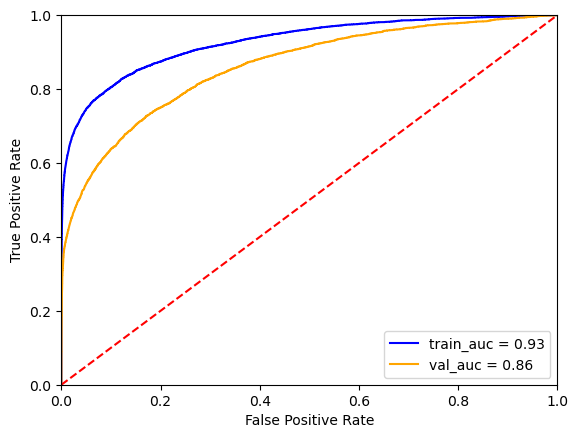

In [29]:
draw_roc_auc(xgb_model_1, dtrain, dvalid,y_train, y_valid )

## Задание 2:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Приведем категориалные фитчи к числовому виду.

In [30]:
def category_to_digit(df, features):  
    for i, feature in enumerate(features):
        # feature = str.replace(feature,' ','_')
        values_list = df[feature].value_counts()
        names = sorted(values_list.index)
        # names = sorted(names)
        for name in names:
            name = str.replace(name,' ','_')
            df.insert(3, f'{feature}_{name}', np.where((df[feature]==name),1,0), True)
            
    df.drop(features, axis=1, inplace=True)

In [31]:
print(categorical)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [32]:
features = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

x_data_train_cat = x_data_train.iloc[:]
x_data_test_cat = x_data_test.iloc[:]

category_to_digit(x_data_train_cat, features) # их нужно обрабатывать синхронно.
category_to_digit(x_data_test_cat, features)

# Удалим все категориальные признаки.
x_data_train_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)
x_data_test_cat.drop(['P_emaildomain', 'R_emaildomain'], axis=1, inplace=True)

In [33]:
for x,y in list(zip(x_data_test_cat.columns, x_data_train_cat.columns)):
    if x!= y:
        print(x,y)

In [34]:
x_data_train_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_T,M9_F,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.5,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,0,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
x_data_test_cat.head()

,TransactionID,TransactionDT,TransactionAmt,M9_T,M9_F,M8_T,M8_F,M7_T,M7_F,M6_T,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,7415038,226.00,1,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,7415054,3072.00,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,7415081,319.95,1,0,0,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3287003,7415111,171.00,1,0,1,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3287004,7415112,107.95,1,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Обучим модель на новых данных

In [36]:
xgb_dtrain_1 = xgb.DMatrix(
    data=x_data_train_cat, label=y_train
)

xgb_dvalid_1 = xgb.DMatrix(
    data=x_data_test_cat, label=y_valid
)

In [37]:
xgb_model_2 = xgb.train(
    params=params,
    dtrain=xgb_dtrain_1,
    num_boost_round=10000,
    early_stopping_rounds=50,
    evals=[(xgb_dtrain_1, "train"), (xgb_dvalid_1, "valid")],
    verbose_eval=25,
    maximize=True,
)

[0]	train-auc:0.63401	valid-auc:0.63204
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[25]	train-auc:0.86129	valid-auc:0.83936
[50]	train-auc:0.89135	valid-auc:0.85591
[75]	train-auc:0.90572	valid-auc:0.86009
[100]	train-auc:0.91327	valid-auc:0.86335
[125]	train-auc:0.91828	valid-auc:0.86603
[150]	train-auc:0.92169	valid-auc:0.86758
[175]	train-auc:0.92489	valid-auc:0.86864
[200]	train-auc:0.92711	valid-auc:0.86902
[225]	train-auc:0.93024	valid-auc:0.86960
[250]	train-auc:0.93248	valid-auc:0.86969
[275]	train-auc:0.93401	valid-auc:0.86995
[300]	train-auc:0.93563	valid-auc:0.87053
[325]	train-auc:0.93701	valid-auc:0.87078
[350]	train-auc:0.93792	valid-auc:0.87035
Stopping. Best iteration:
[321]	train-auc:0.93681	valid-auc:0.87095



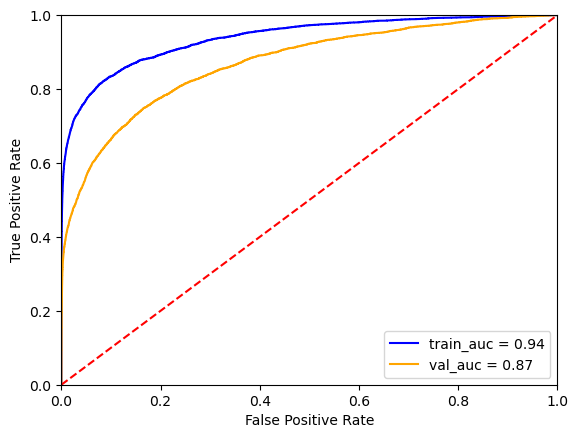

In [38]:
draw_roc_auc(xgb_model_2, xgb_dtrain_1, xgb_dvalid_1, y_train, y_valid )

## Задание 4:
для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [39]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    # "reg_lambda": 50,
    # "max_depth": 4,
    "n_jobs": 6,
    "seed": 27
}

In [40]:
lgb_dtrain_1 = lgb.Dataset(
    data=x_data_train_num, label=y_train
)
lgb_dvalid_1 = lgb.Dataset(
    data=x_data_test_num, label=y_valid
)

In [41]:
lgb_model_1 = lgb.train(
    params=params,
    train_set=lgb_dtrain_1,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_1, lgb_dvalid_1],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32181
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 377
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.915802	valid_1's auc: 0.84922
[50]	training's auc: 0.940841	valid_1's auc: 0.853306
[75]	training's auc: 0.952896	valid_1's auc: 0.854611
[100]	training's auc: 0.96145	valid_1's auc: 0.852862
[125]	training's auc: 0.970642	valid_1's auc: 0.849535
Early stopping, best iteration is:
[79]	training's auc: 0.954433	valid_1's auc: 0.855132


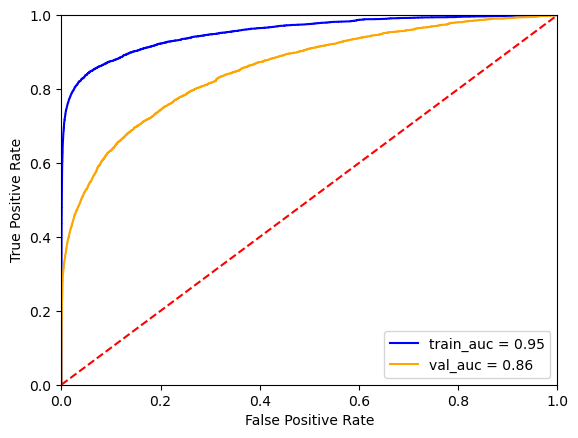

In [42]:
draw_roc_auc(lgb_model_1, x_data_train_num, x_data_test_num, y_train, y_valid)

## Задание 5:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [43]:
lgb_dtrain_2 = lgb.Dataset(
    data=x_data_train_cat, label=y_train
)
lgb_dvalid_2 = lgb.Dataset(
    data=x_data_test_cat, label=y_valid
)

In [44]:
lgb_model_2 = lgb.train(
    params=params,
    train_set=lgb_dtrain_2,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_2, lgb_dvalid_2],
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32237
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 405
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.918961	valid_1's auc: 0.858102
[50]	training's auc: 0.944674	valid_1's auc: 0.862263
[75]	training's auc: 0.958944	valid_1's auc: 0.864617
[100]	training's auc: 0.96652	valid_1's auc: 0.861982
Early stopping, best iteration is:
[67]	training's auc: 0.955179	valid_1's auc: 0.864621


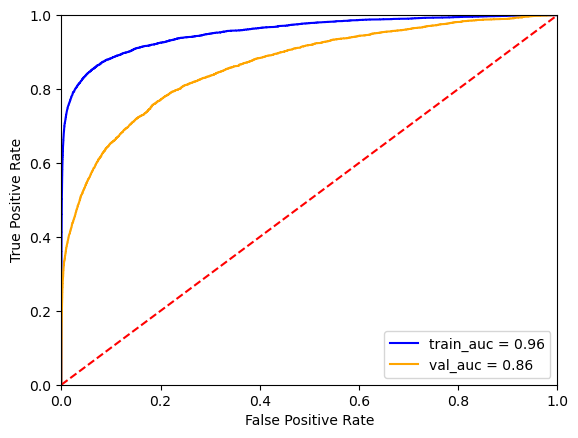

In [45]:
draw_roc_auc(lgb_model_2, x_data_train_cat, x_data_test_cat, y_train, y_valid )

## Задание 6:
обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [47]:
x_data_train[categorical]=x_data_train[categorical].astype('category')
x_data_test[categorical]=x_data_test[categorical].astype('category')

In [48]:
lgb_dtrain_3 = lgb.Dataset(
    data=x_data_train, label=y_train,categorical_feature=categorical
)
lgb_dvalid_3 = lgb.Dataset(
    data=x_data_test, label=y_valid,categorical_feature=categorical
)

In [50]:
lgb_model_3 = lgb.train(
    params=params,
    train_set=lgb_dtrain_3,
    num_boost_round=10000,
    valid_sets=[lgb_dtrain_3, lgb_dvalid_3],
    # feature_name=categorical,
    categorical_feature=categorical,
    early_stopping_rounds=50,
    verbose_eval=25
)

[LightGBM] [Info] Number of positive: 5141, number of negative: 174859
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32346
[LightGBM] [Info] Number of data points in the train set: 180000, number of used features: 391
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028561 -> initscore=-3.526732
[LightGBM] [Info] Start training from score -3.526732
Training until validation scores don't improve for 50 rounds
[25]	training's auc: 0.922704	valid_1's auc: 0.858735
[50]	training's auc: 0.948124	valid_1's auc: 0.864993
[75]	training's auc: 0.961349	valid_1's auc: 0.866013
[100]	training's auc: 0.969987	valid_1's auc: 0.86545
Early stopping, best iteration is:
[62]	training's auc: 0.957052	valid_1's auc: 0.866936


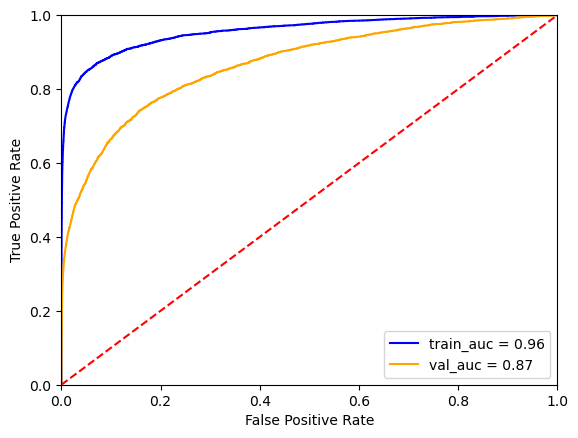

In [51]:
draw_roc_auc(lgb_model_3, x_data_train, x_data_test, y_train, y_valid )

## Задание 7:
для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [52]:
cb_params = {
    "n_estimators": 10000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 25,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 100,
    "thread_count": 6,
    "random_seed": 27,
}

In [53]:
train_pool = cb.Pool(x_data_train_num, y_train)
valid_pool = cb.Pool(x_data_test_num, y_valid)

In [54]:
cat_model_1 = cb.CatBoostClassifier(**cb_params)
cat_model_1.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6910253	best: 0.6910253 (0)	total: 182ms	remaining: 30m 16s
25:	test: 0.8227441	best: 0.8257275 (21)	total: 1.67s	remaining: 10m 39s
50:	test: 0.8367440	best: 0.8376213 (47)	total: 3.18s	remaining: 10m 20s
75:	test: 0.8352498	best: 0.8376213 (47)	total: 4.73s	remaining: 10m 17s
100:	test: 0.8358676	best: 0.8376213 (47)	total: 6.19s	remaining: 10m 6s
125:	test: 0.8348893	best: 0.8376213 (47)	total: 7.79s	remaining: 10m 10s
150:	test: 0.8377501	best: 0.8381799 (145)	total: 9.33s	remaining: 10m 8s
175:	test: 0.8440099	best: 0.8440099 (175)	total: 10.9s	remaining: 10m 10s
200:	test: 0.8478708	best: 0.8478708 (200)	total: 12.6s	remaining: 10m 14s
225:	test: 0.8498200	best: 0.8498200 (225)	total: 14.1s	remaining: 10m 9s
250:	test: 0.8511435	best: 0.8512202 (249)	total: 15.7s	remaining: 10m 9s
275:	test: 0.8516833	best: 0.8516833 (275)	total: 17.2s	remaining: 10m 5s
300:	test: 0.8526406	best: 0.8527714 (296)	total: 18.8s	remaining: 10m 4s
325:	test: 0.8533432	best: 0.8533432 (325)	

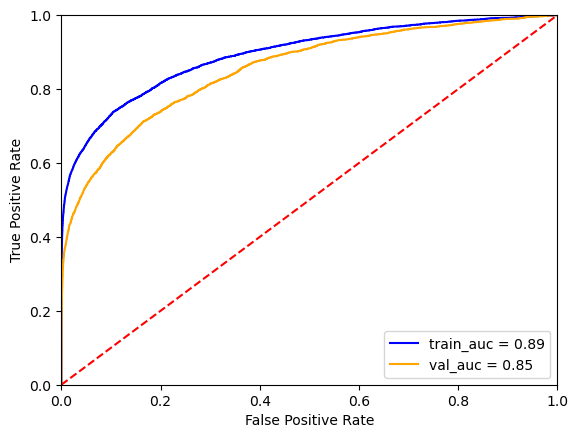

In [55]:
draw_roc_auc(cat_model_1, x_data_train_num, x_data_test_num, y_train, y_valid )

## Задание 8:
обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [56]:
train_pool = cb.Pool(x_data_train_cat, y_train)
valid_pool = cb.Pool(x_data_test_cat, y_valid)

In [57]:
cat_model_2 = cb.CatBoostClassifier(**cb_params)
cat_model_2.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6103841	best: 0.6103841 (0)	total: 76.4ms	remaining: 12m 44s
25:	test: 0.8201701	best: 0.8202535 (22)	total: 1.4s	remaining: 8m 56s
50:	test: 0.8335588	best: 0.8335588 (50)	total: 2.93s	remaining: 9m 32s
75:	test: 0.8409052	best: 0.8415548 (70)	total: 4.38s	remaining: 9m 32s
100:	test: 0.8418431	best: 0.8419352 (96)	total: 5.98s	remaining: 9m 45s
125:	test: 0.8438627	best: 0.8439696 (123)	total: 7.49s	remaining: 9m 46s
150:	test: 0.8459724	best: 0.8459724 (150)	total: 9.19s	remaining: 9m 59s
175:	test: 0.8492213	best: 0.8496432 (169)	total: 10.8s	remaining: 10m 1s
200:	test: 0.8514849	best: 0.8514849 (200)	total: 12.4s	remaining: 10m 5s
225:	test: 0.8534869	best: 0.8538258 (222)	total: 14.1s	remaining: 10m 8s
250:	test: 0.8549141	best: 0.8549141 (250)	total: 15.7s	remaining: 10m 8s
275:	test: 0.8554883	best: 0.8556801 (268)	total: 17.3s	remaining: 10m 10s
300:	test: 0.8562472	best: 0.8562472 (300)	total: 18.8s	remaining: 10m 6s
325:	test: 0.8574589	best: 0.8574600 (323)	tota

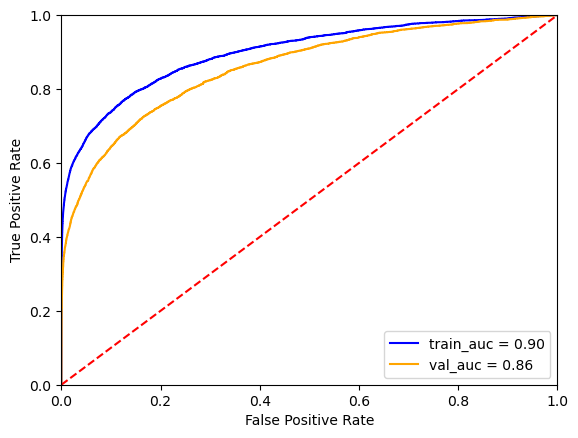

In [58]:
draw_roc_auc(cat_model_2, x_data_train_cat, x_data_test_cat, y_train, y_valid )

## Задание 9:
обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [59]:
x_data_train[categorical]=x_data_train[categorical].astype(str)
x_data_test[categorical]=x_data_test[categorical].astype(str)

In [60]:
train_pool = cb.Pool(x_data_train, y_train, cat_features=categorical)
valid_pool = cb.Pool(x_data_test, y_valid, cat_features=categorical)

In [61]:
cat_model_3 = cb.CatBoostClassifier(**cb_params)
cat_model_3.fit(train_pool, eval_set=valid_pool)

0:	test: 0.5605652	best: 0.5605652 (0)	total: 410ms	remaining: 1h 8m 20s
25:	test: 0.8152069	best: 0.8173277 (21)	total: 8.27s	remaining: 52m 52s
50:	test: 0.8300307	best: 0.8302434 (47)	total: 17.4s	remaining: 56m 42s
75:	test: 0.8376844	best: 0.8376844 (75)	total: 26.2s	remaining: 57m 6s
100:	test: 0.8444864	best: 0.8451217 (98)	total: 35.8s	remaining: 58m 25s
125:	test: 0.8424648	best: 0.8451217 (98)	total: 45.6s	remaining: 59m 33s
150:	test: 0.8453583	best: 0.8453583 (150)	total: 55.3s	remaining: 1h 8s
175:	test: 0.8479608	best: 0.8479608 (175)	total: 1m 9s	remaining: 1h 4m 49s
200:	test: 0.8520056	best: 0.8520056 (200)	total: 1m 20s	remaining: 1h 5m 36s
225:	test: 0.8549530	best: 0.8549530 (225)	total: 1m 32s	remaining: 1h 6m 55s
250:	test: 0.8568327	best: 0.8568654 (249)	total: 1m 43s	remaining: 1h 7m 12s
275:	test: 0.8575697	best: 0.8575697 (275)	total: 1m 52s	remaining: 1h 6m 4s
300:	test: 0.8587485	best: 0.8587485 (300)	total: 2m	remaining: 1h 4m 37s
325:	test: 0.8593157	best:

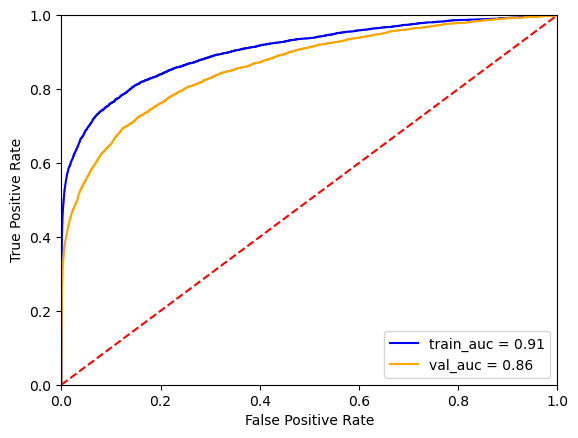

In [62]:
draw_roc_auc(cat_model_3, x_data_train, x_data_test, y_train, y_valid )

## Задание 10:
построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [63]:
# сделано выше->